In [5]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date, timedelta

In [ ]:
df.head()

In [ ]:
df['date'] = pd.to_datetime(df.timestamp, unit='s')

In [ ]:
df1 = df['date']

In [ ]:
df1 = df1.to_frame()

In [ ]:
df1['time'] = df1.date.dt.time

In [ ]:
df1 = df1.sort_values(by='date',ascending=True)

In [ ]:
df1.to_csv('2machine')

In [ ]:
df1['ts'] = df1.date.values.astype(np.int64) // 10 ** 9`

In [ ]:
df1 = df1.sort_values(by='ts',ascending=True)

In [ ]:
df2 = pd.DataFrame(np.diff(df1.ts), columns=['time_diff'])

In [ ]:
down_time = df2.query('time_diff > 5000').time_diff.sum()

In [ ]:
total_time = df2.time_diff.sum()

In [ ]:
work_time = total_time - down_time

In [ ]:
downtime

In [ ]:
dff = pd.DataFrame([down_time,total_time], index=['Время простоя','Время работы'], columns=['секунды'])

In [ ]:
dff

In [ ]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0

dff.plot.pie(y='секунды', figsize = (8,8),
             explode = (0, 0.03),
             autopct='%1.1f%%',
             colors=('tomato','dimgray'),
             labels= None,
             startangle=90,
             textprops={'color':"w"},
             ylabel = '')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs'
sizes = [15, 30]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(dff[0], labels=dff.index,
             explode = (0, 0.05),
             autopct='%1.1f%%',
             colors=('tomato','dimgray'),
             startangle=90)
_, _,autotexts = ax1.pie(dff[0], labels=dff.index,
             explode = (0, 0.05),
             autopct='%1.1f%%',
             colors=('tomato','dimgray'),
             startangle=90)
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

In [ ]:
down_time/work_time * 100

In [9]:
last_day = dt.today().replace(day=1) - timedelta(days=1)

In [10]:
start_day =  date.today().replace(day=1) - timedelta(days=last_day.day)

In [11]:
start_day

datetime.date(2021, 2, 1)

In [ ]:
date.today().replace(day=1)

In [ ]:
timedelta(days=1)

In [ ]:
timedelta(days=last_day.day)

In [ ]:
last_day

In [ ]:
date.fromtimestamp()

In [ ]:
date.today().replace(day=1)

In [ ]:
str(start_day)

In [250]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date, timedelta
import mysql.connector
from mysql.connector import Error
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0

class Machine_stats:
    
    def __init__(self):
        self.machines_id = {1:'11010401', 2:'11030401', 4:'12040401', 5:'12060401', 6:'13070401'}
        self.prev_month_last_day = date.today().replace(day=1) - timedelta(days=1)
        self.prev_month_start_day =  date.today().replace(day=1) - timedelta(days=last_day.day)
        self.today =  date.today()
        self.curr_month_start_day = date.today().replace(day=1)
        
        
    def read_database(self, date_in, date_out, id_num=1): 
        conn = mysql.connector.connect(host='172.15.0.225',
                                       database='dispall_cbk',
                                       user='reader',
                                       password='12341234')
        
        query='''SELECT date_in
                 FROM ustr
                 WHERE id= {id} and znach>0 and
                 date_in BETWEEN  "{datein}" and "{dateout}" '''.format(datein=date_in,
                                       dateout= date_out,
                                       id= self.machines_id[id_num])
        df = pd.read_sql_query(query,conn)
        df = df.rename(columns={'date_in' : 'date'})
        conn.close()
        return df
    
    
    def find_diff(self,df):
        df['ts'] = df.date.values.astype(np.int64) // 10 ** 9
        df_diff = pd.DataFrame(np.diff(df.ts), columns=['time_diff'])
        return df_diff
    
    def prev_mon_pie_plot(self, id_num=1, time=300):
        day_in = str(self.prev_month_start_day) + '00:00:00'
        day_out = str(self.prev_month_last_day) + ' 23:59:59'
        df = self.find_diff(self.read_database(day_in, day_out, id_num)) 
        
        down_time = df.query('time_diff > @time').time_diff.sum() # время простоя
        total_time = df.time_diff.sum() # общее время
        work_time = total_time - down_time # время работы
        
        plot_df = pd.DataFrame([down_time,total_time], index=['Время простоя','Время работы'], columns=['секунды'])
        
        plot_df.plot.pie(y='секунды', figsize = (8,8),
             explode = (0, 0.03),
             autopct='%1.1f%%',
             colors=('tomato','dimgray'),
             labels= None,
             startangle=90,
             textprops={'color':"w"},
             ylabel = '')
        return f'Простой {down_time} работа {work_time}, общее время {total_time}'
        
    def curr_mon_pie_plot(self, id_num=1, time=300):
        day_in = str(self.curr_month_start_day)
        day_out = str(self.today) + ' 23:59:59'
        df = self.find_diff(self.read_database(day_in, day_out, id_num)) 
        
        down_time = df.query('time_diff > @time').time_diff.sum() # время простоя
        total_time = df.time_diff.sum() # общее время
        work_time = total_time - down_time # время работы
        
        plot_df = pd.DataFrame([down_time,work_time], index=['Время простоя','Время работы'], columns=['секунды'])
        
        plot_df.plot.pie(y='секунды', figsize = (8,8),
             explode = (0, 0.03),
             autopct='%1.1f%%',
             colors=('tomato','dimgray'),
             labels= None,
             startangle=90,
             textprops={'color':"w"},
             ylabel = '')
        
        return f'Простой {down_time} работа {work_time}, общее время {total_time}'
    
    def pie_plot(self,day_in, day_out, id_num=1, time=300):

        df = self.find_diff(self.read_database(day_in, day_out, id_num)) 
        
        down_time = df.query('time_diff > @time').time_diff.sum() # время простоя
        total_time = df.time_diff.sum() # общее время
        work_time = total_time - down_time # время работы
        
        plot_df = pd.DataFrame([down_time,work_time], index=['Время простоя','Время работы'], columns=['секунды'])
        
        plot_df.plot.pie(y='секунды', figsize = (8,8),
             explode = (0, 0.03),
             autopct='%1.1f%%',
             colors=('tomato','dimgray'),
             labels= None,
             startangle=90,
             textprops={'color':"w"},
             ylabel = '')
        
        return f'Простой {down_time} работа {work_time}, общее время {total_time}'

In [17]:
'''SELECT date_in, znach\
   FROM ustr\
   WHERE date_in > {datein} and date_in < {dateout} and id={id} and znach>0'''.format(datein=str(start_day) + ' 23:59:59',
                                                                                     dateout= str(start_day) + ' 23:59:59',
                                                                                     id= '121212')

'SELECT date_in, znach   FROM ustr   WHERE date_in > 2021-02-01 23:59:59 and date_in < 2021-02-01 23:59:59 and id=121212 and znach>0'

In [186]:
 date.today()

datetime.date(2021, 3, 9)

In [252]:
b = Machine_stats()

In [225]:
s1 = str(b.today) + ' 00:00:00'
s2 = str(b.today) + ' 23:59:59'

In [216]:
s1

'2021-03-0900:00:00'

'Простой 18400 работа 35945, общее время 54345'

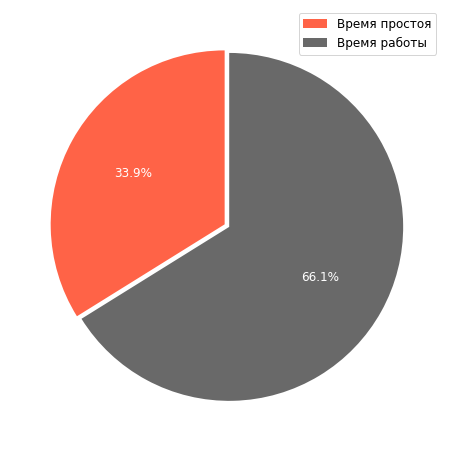

In [254]:
b.pie_plot(s1,s2)

In [227]:
df = b.read_database(s1,s2)
df['ts'] = df.date.values.astype(np.int64) // 10 ** 9
df_diff = pd.DataFrame(np.diff(df.ts), columns=['time_diff'])
df_diff

,time_diff
0,10
1,10
2,15
3,10
4,10
...,...
3676,10
3677,10
3678,5
3679,10


In [228]:
df

,date,ts
0,2021-03-09 00:00:09,1615248009
1,2021-03-09 00:00:19,1615248019
2,2021-03-09 00:00:29,1615248029
3,2021-03-09 00:00:44,1615248044
4,2021-03-09 00:00:54,1615248054
...,...,...
3677,2021-03-09 14:30:14,1615300214
3678,2021-03-09 14:30:24,1615300224
3679,2021-03-09 14:30:29,1615300229
3680,2021-03-09 14:30:39,1615300239


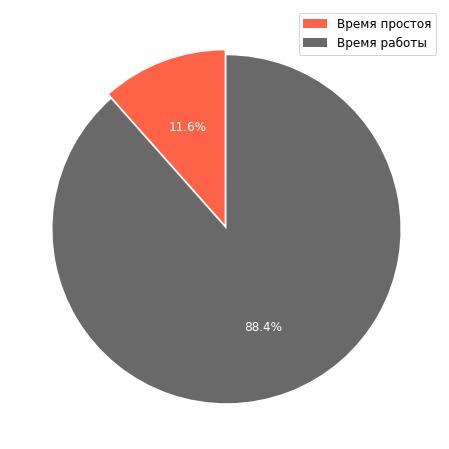

In [192]:
b.curr_mon_pie_plot()

In [107]:
df1 = b.find_diff(df)

In [108]:
df1

,time_diff
0,4345
1,10
2,10
3,10
4,15
...,...
115345,5
115346,10
115347,10
115348,5


In [110]:
str(b.prev_month_last_day)

'2021-02-28 13:09:38.525055'

In [111]:
b.prev_month_start_day

datetime.date(2021, 2, 1)

In [115]:
b.today

datetime.date(2021, 3, 9)

In [120]:
b.curr_month_start_day

datetime.date(2021, 3, 1)

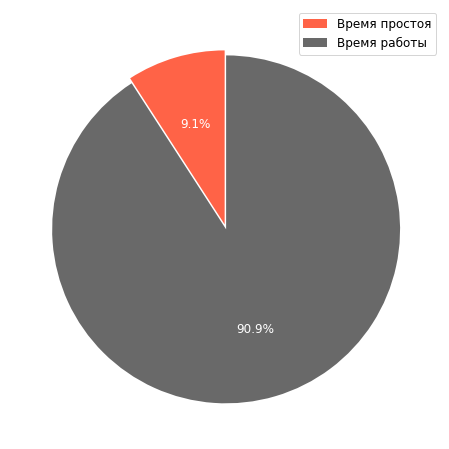

In [256]:
a = b.pie_plot('2021-03-08 00:00:00','2021-03-08 23:59:59' )
#a['ts'] = a.date.values.astype(np.int64) // 10 ** 9
#a    

In [244]:
aa = b.find_diff(a)
aa

,time_diff
0,5
1,5
2,10
3,10
4,5
...,...
11835,10
11836,15
11837,15
11838,10


In [245]:
1615300359 - 1615161609 == aa.time_diff.sum()

True